In [ ]:
pip install NRCLex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for NRCLex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=16ee31c465394b294531e4416d8b99233d2aaadf21e07d66f0cea4531f42a782
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built NRCLex


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


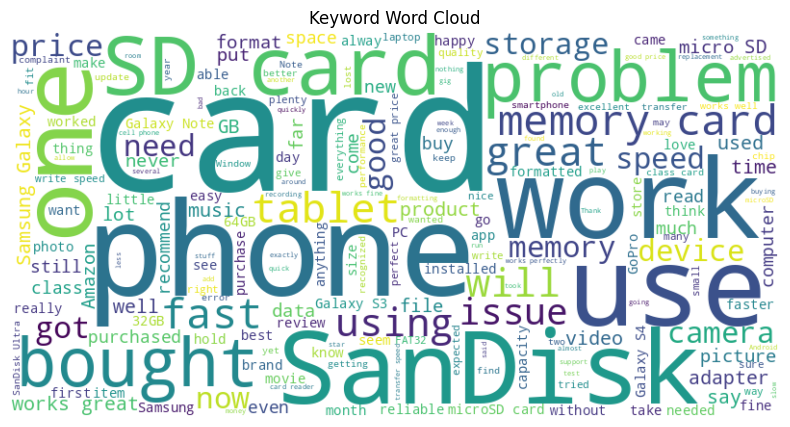

MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
import pandas as pd
import nltk
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nrclex import NRCLex

# Load the dataset
file_path = "/content/amazon_review.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Ensure nltk resources are available
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """Analyzes sentiment polarity using TextBlob and VADER"""
    if isinstance(text, str):
        blob_sentiment = TextBlob(text).sentiment.polarity
        vader_sentiment = sia.polarity_scores(text)['compound']

        sentiment_label = "Neutral"
        if vader_sentiment > 0.05:
            sentiment_label = "Positive"
        elif vader_sentiment < -0.05:
            sentiment_label = "Negative"

        return blob_sentiment, vader_sentiment, sentiment_label
    return 0, 0, "Neutral"

# Apply sentiment analysis
df[['blob_sentiment', 'vader_sentiment', 'sentiment_label']] = df['reviewText'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Keyword Mapping (Word Cloud)
all_text = ' '.join(str(text) for text in df['reviewText'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Keyword Word Cloud")
plt.show()

# Emotional Analysis
def analyze_emotions(text):
    """Extracts emotion scores using NRCLex"""
    if isinstance(text, str):
        emotion_analysis = NRCLex(text)
        return emotion_analysis.raw_emotion_scores
    return {}

df['emotions'] = df['reviewText'].apply(analyze_emotions)

# Display processed dataframe
df[['reviewText', 'sentiment_label', 'emotions']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


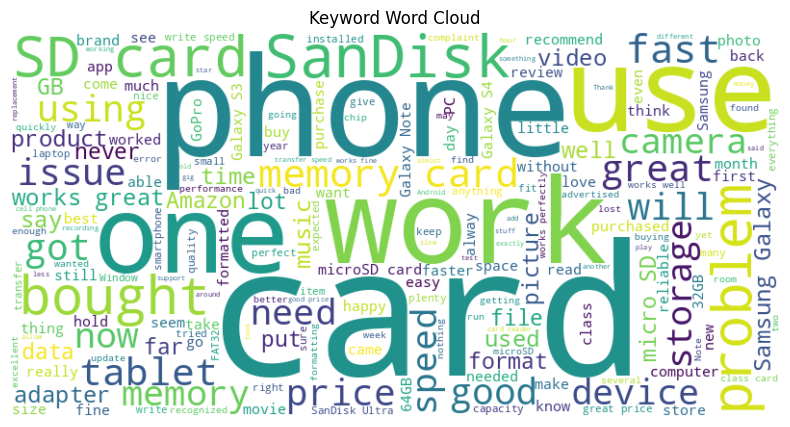

,reviewText,sentiment_label,emotions
0,No issues.,Negative,{}
1,"Purchased this for my device, it worked as adv...",Negative,{}
2,it works as expected. I should have sprung for...,Negative,{}
3,This think has worked out great.Had a diff. br...,Positive,{}
4,"Bought it with Retail Packaging, arrived legit...",Positive,{}


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('reviewText').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('sentiment_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['sentiment_label'].value_counts()
    for x_label, grp in _df_2.groupby('reviewText')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('reviewText')
_ = plt.ylabel('sentiment_label')

In [ ]:
import pandas as pd
import nltk
import os
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the file path
file_path = "/content/amazon_review.csv"

# Check if file exists before reading
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path} was not found. Please check the path and ensure the file is present.")

# Load the dataset
df = pd.read_csv(file_path)

# Ensure nltk resources are available
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """Analyzes sentiment polarity using VADER"""
    if isinstance(text, str):
        vader_sentiment = sia.polarity_scores(text)['compound']

        sentiment_label = "Neutral"
        if vader_sentiment > 0.05:
            sentiment_label = "Positive"
        elif vader_sentiment < -0.05:
            sentiment_label = "Negative"

        return vader_sentiment, sentiment_label
    return 0, "Neutral"

# Apply sentiment analysis
df[['vader_sentiment', 'sentiment_label']] = df['reviewText'].apply(lambda x: pd.Series(analyze_sentiment(x)))

# Keyword Mapping (Word Cloud)
all_text = ' '.join(str(text) for text in df['reviewText'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Keyword Word Cloud")
plt.show()

# Emotional Analysis using a simple word-based approach
def analyze_emotions(text):
    """Extracts basic emotion scores using a predefined keyword approach"""
    emotions_dict = {
        "happy": "joy", "great": "joy", "excellent": "joy", "good": "joy", "love": "joy",
        "sad": "sadness", "bad": "sadness", "terrible": "sadness", "horrible": "sadness",
        "angry": "anger", "mad": "anger", "furious": "anger", "upset": "anger"
    }

    if isinstance(text, str):
        words = text.lower().split()
        emotion_counts = {}
        for word in words:
            if word in emotions_dict:
                emotion = emotions_dict[word]
                emotion_counts[emotion] = emotion_counts.get(emotion, 0) + 1
        return emotion_counts
    return {}

df['emotions'] = df['reviewText'].apply(analyze_emotions)

# Display processed dataframe
df[['reviewText', 'sentiment_label', 'emotions']].head()


In [ ]:
pip install nltk


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Ensure nltk resources are available
nltk.download('vader_lexicon')

# Load the dataset
file_path = "/content/amazon_review.csv"  # Update this path if necessary
df = pd.read_csv(file_path)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to perform VADER sentiment analysis
def analyze_vader_sentiment(text):
    """Analyzes sentiment polarity using VADER."""
    if isinstance(text, str):
        sentiment_scores = sia.polarity_scores(text)
        return sentiment_scores['compound']
    return 0  # Neutral score if no text

# Apply VADER sentiment analysis
df["vader_sentiment"] = df["reviewText"].apply(analyze_vader_sentiment)

# Classify sentiment based on VADER scores
def classify_vader_sentiment(score):
    """Classifies VADER sentiment score into Positive, Neutral, or Negative."""
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["vader_sentiment_label"] = df["vader_sentiment"].apply(classify_vader_sentiment)

# Save the results to a CSV file
df.to_csv("amazon_reviews_vader_sentiment.csv", index=False)

# Display sample results
print(df[["reviewText", "vader_sentiment", "vader_sentiment_label"]].head(10))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          reviewText  vader_sentiment  \
0                                         No issues.          -0.2960   
1  Purchased this for my device, it worked as adv...          -0.2960   
2  it works as expected. I should have sprung for...          -0.3089   
3  This think has worked out great.Had a diff. br...           0.7081   
4  Bought it with Retail Packaging, arrived legit...           0.7087   
5  It's mini storage.  It doesn't do anything els...           0.0000   
6  I have it in my phone and it never skips a bea...           0.8992   
7  It's hard to believe how affordable digital ha...           0.7768   
8  Works in a HTC Rezound.  Was running short of ...          -0.2960   
9  in my galaxy s4, super fast card, and am total...           0.9167   

  vader_sentiment_label  
0              Negative  
1              Negative  
2              Negative  
3              Positive  
4              Positive  
5               Neutral  
6             